In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [9]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ELCOT\Desktop\YAMINI\abalone.csv")

## Perform Below Visualizations.
##uni-variate
##Bi - Variate Analysis
##Multi - Variate Analysis



C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

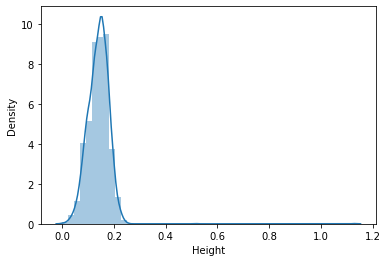

In [4]:
#univariate
import seaborn as sns
sns.distplot(data['Height'])

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

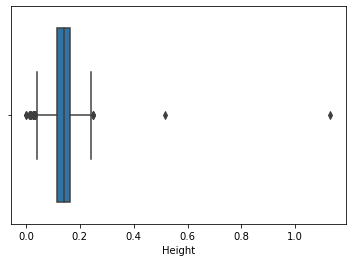

In [5]:
sns.boxplot(data['Height'])

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Length'>

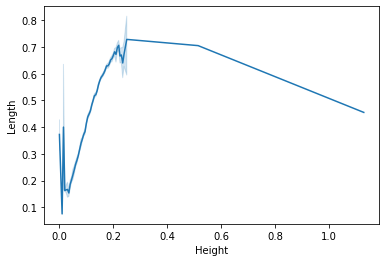

In [6]:
#bivariate analysis
sns.lineplot(data['Height'], data['Length'])


In [7]:
sns.barplot(data['ages'], data['Height'])

KeyError: 'ages'

In [ ]:
#Multi - Variate Analysis
sns.scatterplot(data['ages'], data['Height'], hue = data['Viscera weight'])

In [ ]:
sns.scatterplot(data['ages'], data['Height'], hue = data['Viscera weight'])

In [ ]:
sns.barplot(data['Length'],data['Diameter'], hue = data['Height'])

##descriptive analysis

In [ ]:
data.describe()

In [ ]:
data.hist(figsize=(20,10), grid=False, layout=(2, 5), bins = 30)

## Handle the Missing values.

In [ ]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

##outliers

In [ ]:
sns.boxplot(data['Viscera weight'])

In [ ]:
## handling outliers
import numpy as np
data['ages'] = np.where(data['ages']>45, 31, data['ages'])
sns.boxplot(data['ages'])

In [ ]:
q = data.quantile([0.75,0.25])

In [ ]:
q

In [ ]:
iqr = q.iloc[0] - q.iloc[1]

In [ ]:
iqr

In [ ]:
u = q.iloc[0] + (1.5*iqr)

In [ ]:
u

##Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Diameter'] = le.fit_transform(data['Diameter'])
data.head()

In [ ]:
data.head()

##Split the data into dependent and independent variables

In [ ]:
x = data.iloc[:, 0:5]
x

In [ ]:
data.iloc[:, -1].values

##Scale the independent variables

In [ ]:
from sklearn import preprocessing

 
# separate the independent and dependent variables
X_data = data.ages

 
# standardization of dependent variables
standard = preprocessing.scale(X_data)
print(standard)


In [ ]:
standard

##train the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.05, random_state=0)



In [ ]:
X_train

In [ ]:
data.info()

##modal building


In [ ]:
from sklearn.preprocessing import OneHotEncoder
transformed_sex_feature = OneHotEncoder().fit_transform(data['Sex'].values.reshape(-1,1)).toarray()
data_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
data = pd.concat([data, data_sex_encoded], axis=1)

In [ ]:
data.head()

In [ ]:
Xtrain = data.drop(['Rings','Height','Sex'], axis = 1)
Ytrain = data['Rings']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

In [ ]:
result_acc

##train the model

In [3]:
from random import randint
  
# the limit within which random numbers are generated
TRAIN_SET_LIMIT = 1000
  
# to create exactly 100 data items
TRAIN_SET_COUNT = 100
  
# list that contains input and corresponding output
TRAIN_INPUT = list()
TRAIN_OUTPUT = list()
  
# loop to create 100 data  items with three columns each
for i in range(TRAIN_SET_COUNT):
    a = randint(0, TRAIN_SET_LIMIT)
    b = randint(0, TRAIN_SET_LIMIT)
    c = randint(0, TRAIN_SET_LIMIT)
  
# creating the output for each data item
    op = a + (2 * b) + (3 * c)
    TRAIN_INPUT.append([a, b, c])
  
# adding each output to output list
    TRAIN_OUTPUT.append(op)

In [4]:
from sklearn.linear_model import LinearRegression
  
# Initialize the linear regression model
predictor = LinearRegression(n_jobs =-1)
  
# Fill the Model with the Data
predictor.fit(X = TRAIN_INPUT, y = TRAIN_OUTPUT)

LinearRegression(n_jobs=-1)

##test the model

In [5]:
X_TEST = [[ 10, 20, 30 ]]
  
# Predict the result of X_TEST which holds testing data
outcome = predictor.predict(X = X_TEST)
  
# Predict the coefficients
coefficients = predictor.coef_
  
# Print the result obtained for the test data
print('Outcome : {}\nCoefficients : {}'.format(outcome, coefficients))

Outcome : [140.]
Coefficients : [1. 2. 3.]
